In [44]:
import pylab
import numpy as np
import math
import matplotlib.pyplot as plt
#M = 10^11 M_solar
#[M] = 5*10^10 M_solar
M = 2
#L = 25 kpc
#[L] = 3.5kpc
L = 7.1429 #pericenter
#[T] = 10^8
def generate_ring(r,N):
    
    ring = np.ones((N,3))
    vel = np.ones((N,3))
    v = np.sqrt(M/r)
    for i in range(N):
        ring[i,0] = r*np.cos((2*np.pi*i)/N)
        ring[i,1] = r*np.sin((2*np.pi*i)/N)
        ring[i,2] = 0 
        vel[i,0] = v*np.cos((2*np.pi*i)/N)
        vel[i,1] = v*np.sin((2*np.pi*i)/N)
        vel[i,2] = 0

    return ring,vel

def generate_mice(N,r):
    disk = np.array([[0.0,0.0,0.0]])
    o_v = np.array([[0.0,0.0,0.0]])
    for i in range(11):
        x,v = generate_ring((0.2 + 0.05*i)*r, (12 + 3*i))
        o_v = np.append(o_v,v,axis=0)   
        disk  = np.append(disk,x,axis=0)   
        
    return disk,o_v

In [45]:
generate_mice(297,100)


(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.00000000e+01,  0.00000000e+00,  0.00000000e+00],
        [ 1.73205081e+01,  1.00000000e+01,  0.00000000e+00],
        [ 1.00000000e+01,  1.73205081e+01,  0.00000000e+00],
        [ 1.22464680e-15,  2.00000000e+01,  0.00000000e+00],
        [-1.00000000e+01,  1.73205081e+01,  0.00000000e+00],
        [-1.73205081e+01,  1.00000000e+01,  0.00000000e+00],
        [-2.00000000e+01,  2.44929360e-15,  0.00000000e+00],
        [-1.73205081e+01, -1.00000000e+01,  0.00000000e+00],
        [-1.00000000e+01, -1.73205081e+01,  0.00000000e+00],
        [-3.67394040e-15, -2.00000000e+01,  0.00000000e+00],
        [ 1.00000000e+01, -1.73205081e+01,  0.00000000e+00],
        [ 1.73205081e+01, -1.00000000e+01,  0.00000000e+00],
        [ 2.50000000e+01,  0.00000000e+00,  0.00000000e+00],
        [ 2.28386364e+01,  1.01684161e+01,  0.00000000e+00],
        [ 1.67282652e+01,  1.85786206e+01,  0.00000000e+00],
        [ 7.72542486e+00

In [40]:
def rot_mat(deg, n):
    
    ang = np.pi/180.0 * deg
    a = 1 - np.cos(ang)
    s = np.sin(ang)
    c = np.cos(ang)
    R = np.zeros((3,3))
    R[0,0] = a*n[0]**2 + c
    R[0,1] = a*n[0]*n[1] - s*n[2]
    R[0,2] = a*n[0]*n[2] + s*n[1]
    R[1,0] = a*n[0]*n[1] + s*n[2]
    R[1,1] = a*n[1]**2 + c
    R[1,2] = a*n[1]*n[2] - s*n[0]
    R[2,0] = a*n[0]*n[2] - s*n[1]
    R[2,1] = a*n[1]*n[2] + s*n[0]
    R[2,2] = a*n[2]**2 + c
    
    return R
    

In [41]:
gal = generate_mice(297,100)
R = rot_mat(90.0, [0.0,1.0,0.0])
print(R)
mod_disk = np.array([np.matmul(R,gal[i,:]) for i in range(298)])
mod_disk[1,:]
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(gal[:,0],gal[:,1],fc='r', s = 3)
ax2 = fig.add_subplot()
ax2.scatter(mod_disk[:,0],mod_disk[:,1], fc='b', s = 3)

298
[[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 3)

In [61]:
def mice_init(p):
    w = -90
    n1 = [0.0,0.0,1.0]
    i_a = -15
    n2 = [1.0,0.0,0.0]
    i_b = -60
    g_pos, g_vel = generate_mice(297,20)
    R = rot_mat(w, n1)
    Ra = rot_mat(i_a, n2)
    Rb = rot_mat(i_b, n2)
    gal_a = np.array([np.matmul(Ra, np.matmul(R,g_pos[i,:])) for i in range(298)]) - [p,0.0,0.0] 
    gal_b = np.array([np.matmul(Rb, np.matmul(R,g_pos[i,:])) for i in range(298)]) + [p,0.0,0.0]
    va = np.array([np.matmul(Ra, np.matmul(R,g_vel[i,:])) for i in range(298)]) 
    vb = np.array([np.matmul(Rb, np.matmul(R,g_vel[i,:])) for i in range(298)])
    fig = plt.figure(figsize =[10, 10])
    ax = fig.add_subplot(projection='3d')
    ax.scatter(gal_a[:,0],gal_a[:,1], gal_a[:,2], fc='b', s = 3)
    ax.scatter(gal_b[:,0],gal_b[:,1], gal_b[:,2], fc='r', s = 3)
   
    ax.view_init(elev=100., azim=50)
    gal = np.append(gal_a, gal_b, axis=0)
    all_v = np.append(va, vb,axis=0)
    return (gal, all_v) 
    plt.show()

[-100.    -100.     -98.     -96.536  -96.     -96.536  -98.    -100.
 -102.    -103.464 -104.    -103.464 -102.    -100.     -97.966  -96.284
  -95.245  -95.027  -95.67   -97.061  -98.96  -101.04  -102.939 -104.33
 -104.973 -104.755 -103.716 -102.034 -100.     -97.948  -96.143  -94.804
  -94.091  -94.091  -94.804  -96.143  -97.948 -100.    -102.052 -103.857
 -105.196 -105.909 -105.909 -105.196 -103.857 -102.052 -100.     -97.937
  -96.057  -94.527  -93.484  -93.02   -93.176  -93.938  -95.239  -96.963
  -98.957 -101.043 -103.037 -104.761 -106.062 -106.824 -106.98  -106.516
 -105.473 -103.943 -102.063 -100.     -97.929  -96.     -94.343  -93.072
  -92.273  -92.     -92.273  -93.072  -94.343  -96.     -97.929 -100.
 -102.071 -104.    -105.657 -106.928 -107.727 -108.    -107.727 -106.928
 -105.657 -104.    -102.071 -100.     -97.924  -95.961  -94.215  -92.781
  -91.736  -91.137  -91.015  -91.378  -92.206  -93.454  -95.054  -96.922
  -98.955 -101.045 -103.078 -104.946 -106.546 -107.794 -10

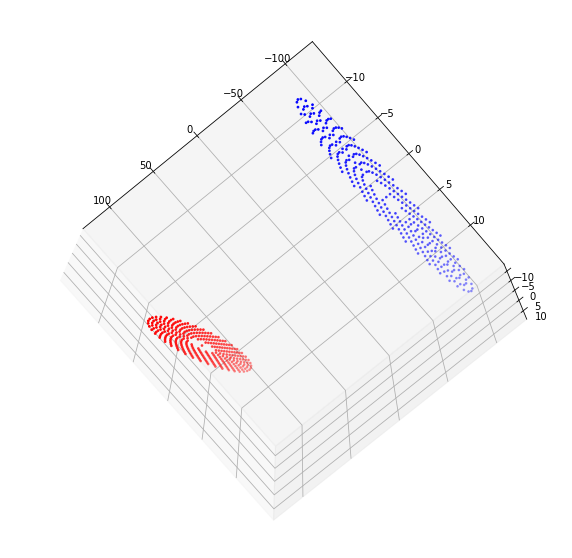

In [94]:
x, v = mice_init(100.0)
print(np.around(x[:,0],3))
np.savetxt('init.out',np.c_[np.around(x[:,0],3), np.around(x[:,1],3), np.around(x[:,2],3), np.around(v[:,0],3) ,np.around(v[:,1],3) ,np.around(v[:,2],3)], fmt='%.3f') 

In [139]:
import pylab
r_in = 100 
x1 , y1 = plot_ring(0.2*r_in,12)
x2 , y2 = plot_ring(0.25*r_in,15)
x3 , y3 = plot_ring(0.3*r_in,18)
x4 , y4 = plot_ring(0.35*r_in,21)
x5 , y5 = plot_ring(0.4*r_in,24)
x6 , y6 = plot_ring(0.45*r_in,27)
x7 , y7 = plot_ring(0.5*r_in,30)
x8 , y8 = plot_ring(0.55*r_in,33)
x9 , y9 = plot_ring(0.6*r_in,36)
x10 , y10 = plot_ring(0.65*r_in,39)
x11 , y11 = plot_ring(0.7*r_in,42)

fig, axes = pylab.subplots()
axes.scatter(x1,y1, fc='b')
axes.scatter(x2,y2, fc='b')
axes.scatter(x3,y3, fc='b')
axes.scatter(x4,y4, fc='b')
axes.scatter(x5,y5, fc='b')
axes.scatter(x6,y6, fc='b')
axes.scatter(x7,y7, fc='b')
axes.scatter(x8,y8, fc='b')
axes.scatter(x9,y9, fc='b')
axes.scatter(x10,y10, fc='b')
axes.scatter(x11,y11, fc='b')
pylab.savefig("mice.png")

NameError: name 'plot_ring' is not defined

In [17]:
x = np.array([[0,0],[1,4]])
y = np.array([[20,30],[13,44]])
print(x)
print(y)
print(np.append(x,y,axis=0))

[[0 0]
 [1 4]]
[[20 30]
 [13 44]]
[[ 0  0]
 [ 1  4]
 [20 30]
 [13 44]]


In [38]:
for i in range(12):
    print(0.2+0.05*i)

0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7
0.75


In [158]:
np.ones((5,3))-[2.0,4.0,6.0]

array([[-1., -3., -5.],
       [-1., -3., -5.],
       [-1., -3., -5.],
       [-1., -3., -5.],
       [-1., -3., -5.]])